# Multi-threading

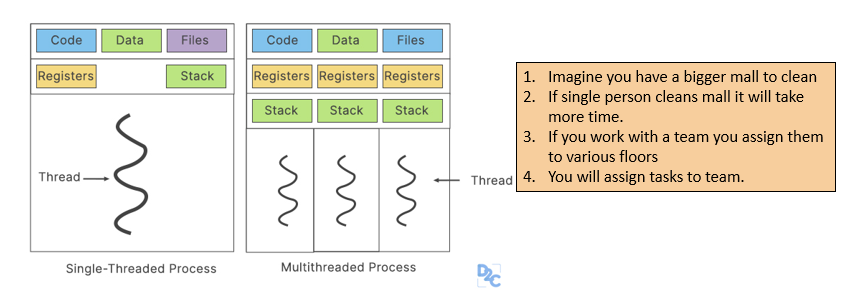

### Single threaded processes
by default coding in python is single threaded

In [1]:
import time

In [5]:
%%time
time.sleep(2.5)
print("Hello!")

Hello!
CPU times: total: 0 ns
Wall time: 2.5 s


In [6]:
def hypotenuse(a, b):
    print("Hypotenuse code execution started")
    time.sleep(2)
    h = (a**2 + b**2)**(1/2)
    print(f"Hypotenuse of sides {a} and {b} is {h:.4f}")
    print("Hypotenuse code completed")

In [7]:
%%time
hypotenuse(3, 4)

Hypotenuse code execution started
Hypotenuse of sides 3 and 4 is 5.0000
Hypotenuse code completed
CPU times: total: 0 ns
Wall time: 2 s


In [8]:
def simple_intrest(p, n, r):
    print("Simple Intrest code execution started")
    time.sleep(3)
    i = (p*n*r)/100
    a = p + i
    print(f"Principal : {p} INR, Number of years : {n} , Rate of Intrest : {r} %p.a.")
    print(f"Intrest : {i:.2f} INR")
    print(f"Amount : {a:.2f} INR")
    print("Simple Intrest Code execution done")

In [9]:
%%time
simple_intrest(p=50_000, n=4, r=6.5)

Simple Intrest code execution started
Principal : 50000 INR, Number of years : 4 , Rate of Intrest : 6.5 %p.a.
Intrest : 13000.00 INR
Amount : 63000.00 INR
Simple Intrest Code execution done
CPU times: total: 0 ns
Wall time: 3 s


In [10]:
%%time
hypotenuse(4, 5) # 2 seconds
simple_intrest(p=60_000, n=5, r=7.1) # 3 seconds

Hypotenuse code execution started
Hypotenuse of sides 4 and 5 is 6.4031
Hypotenuse code completed
Simple Intrest code execution started
Principal : 60000 INR, Number of years : 5 , Rate of Intrest : 7.1 %p.a.
Intrest : 21300.00 INR
Amount : 81300.00 INR
Simple Intrest Code execution done
CPU times: total: 31.2 ms
Wall time: 5 s


### Execute above functions simulatneously using multithreading

In [11]:
from threading import Thread

In [12]:
%%time
# Create the threads
th1 = Thread(target=hypotenuse, args=(12, 13))
th2 = Thread(target=simple_intrest, args=(73000, 6, 6.4))

# Start all the threads
th1.start()
th2.start()

# Wait for all threads to finish
th1.join()
th2.join()

Hypotenuse code execution startedSimple Intrest code execution started

Hypotenuse of sides 12 and 13 is 17.6918
Hypotenuse code completed
Principal : 73000 INR, Number of years : 6 , Rate of Intrest : 6.4 %p.a.
Intrest : 28032.00 INR
Amount : 101032.00 INR
Simple Intrest Code execution done
CPU times: total: 31.2 ms
Wall time: 3.03 s


### For multiple task to execute simulatneously multithreading is faster

### Single function but calculating multiple values

In [17]:
def square(n):
    time.sleep(3)
    s = n**2
    print(f"Square of number {n} is {s}\n\n")

In [18]:
%%time
square(4)

Square of number 4 is 16


CPU times: total: 0 ns
Wall time: 3 s


In [19]:
nums = [1, 2, 3, 4, 5, 6, 7]
nums

[1, 2, 3, 4, 5, 6, 7]

In [20]:
%%time
for i in nums:
    square(i)

Square of number 1 is 1


Square of number 2 is 4


Square of number 3 is 9


Square of number 4 is 16


Square of number 5 is 25


Square of number 6 is 36


Square of number 7 is 49


CPU times: total: 15.6 ms
Wall time: 21 s


In [21]:
def multithread_squares(nums: list[int|float]):
    # Create the list of threads
    threads = []

    # Start all the threads
    for i in nums:
        th = Thread(target=square, args=(i,))
        th.start()
        threads.append(th)

    # Wait for all threads to finish
    for th in threads:
        th.join()

In [22]:
nums

[1, 2, 3, 4, 5, 6, 7]

In [23]:
%%time
multithread_squares(nums)

Square of number 1 is 1


Square of number 7 is 49


Square of number 5 is 25


Square of number 6 is 36


Square of number 4 is 16


Square of number 3 is 9


Square of number 2 is 4


CPU times: total: 31.2 ms
Wall time: 3.05 s


In [29]:
n = list(range(51, 71, 1))
n

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

In [30]:
len(n)

20

In [32]:
%%time
multithread_squares(n)

Square of number 51 is 2601

Square of number 70 is 4900


Square of number 68 is 4624


Square of number 69 is 4761


Square of number 67 is 4489


Square of number 66 is 4356


Square of number 65 is 4225


Square of number 64 is 4096


Square of number 63 is 3969


Square of number 62 is 3844


Square of number 60 is 3600


Square of number 61 is 3721


Square of number 58 is 3364


Square of number 59 is 3481


Square of number 57 is 3249


Square of number 56 is 3136


Square of number 54 is 2916


Square of number 55 is 3025


Square of number 53 is 2809


Square of number 52 is 2704



CPU times: total: 31.2 ms
Wall time: 3.03 s


### Practical example of multithreading - Downloading multiple files

1. [https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv
](https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv
)
2. [https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv
](https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv
)
3. [https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv
](https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv
)

In [33]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv"
]

In [34]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [36]:
urls[0].split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'main',
 'artifacts',
 'data.csv']

In [37]:
urls[0].split("/")[-1]

'data.csv'

In [38]:
from urllib.request import urlretrieve

In [41]:
def download_file(url: str):
    file_name = url.split("/")[-1]
    print(f"{file_name} download started ...")
    urlretrieve(url, file_name)
    print(f"{file_name} download complete")
    print("\n=======================================\n")

In [40]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [42]:
%%time
for i in urls:
    download_file(i)

data.csv download started ...
data.csv download complete


test.csv download started ...
test.csv download complete


train.csv download started ...
train.csv download complete


CPU times: total: 344 ms
Wall time: 4.75 s


In [43]:
def multithread_download(urls: list[str]):
    # Create threads for each url
    threads = []

    # Create and start all threads
    for i in urls:
        th = Thread(target= download_file, args=(i,))
        th.start()
        threads.append(th)

    # Wait for all threads to finish
    for th in threads:
        th.join()

In [44]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [46]:
%%time
multithread_download(urls)

data.csv download started ...
test.csv download started ...
train.csv download started ...
test.csv download complete


train.csv download complete


data.csv download complete


CPU times: total: 312 ms
Wall time: 1.25 s


### Read the csv file in dataframe

In [47]:
import pandas as pd
df1 = pd.read_csv("data.csv")
df1.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [49]:
df2 = pd.read_csv("train.csv")
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,83475,0.32,Premium,E,SI1,61.6,58.0,4.38,4.41,2.71,614
1,160324,1.20,Premium,F,VS2,62.6,57.0,6.81,6.76,4.25,7002
2,101740,1.50,Ideal,I,VS2,62.2,55.0,7.30,7.26,4.53,9347
3,180341,1.67,Premium,I,SI2,61.9,59.0,7.65,7.61,4.71,8525
4,48480,1.00,Good,H,VS2,63.7,60.0,6.34,6.30,4.02,5217


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154858 entries, 0 to 154857
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       154858 non-null  int64  
 1   carat    154858 non-null  float64
 2   cut      154858 non-null  object 
 3   color    154858 non-null  object 
 4   clarity  154858 non-null  object 
 5   depth    154858 non-null  float64
 6   table    154858 non-null  float64
 7   x        154858 non-null  float64
 8   y        154858 non-null  float64
 9   z        154858 non-null  float64
 10  price    154858 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 13.0+ MB


In [51]:
df3 = pd.read_csv("test.csv")
df3.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14,1355
1,165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89,14691
2,96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52,844
3,145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71,707
4,118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23,5797


In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38715 entries, 0 to 38714
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       38715 non-null  int64  
 1   carat    38715 non-null  float64
 2   cut      38715 non-null  object 
 3   color    38715 non-null  object 
 4   clarity  38715 non-null  object 
 5   depth    38715 non-null  float64
 6   table    38715 non-null  float64
 7   x        38715 non-null  float64
 8   y        38715 non-null  float64
 9   z        38715 non-null  float64
 10  price    38715 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


### Find out the median price by diamond cut and sort the results

In [57]:
a = df1.groupby(by="cut") \
    .agg({"price": "median"}) \
    .sort_values(by="price", ascending=False) \
    .round(2)

In [58]:
a

,price
cut,
Premium,3741.5
Fair,3669.0
Good,3592.5
Very Good,2903.0
Ideal,1752.0


<Axes: xlabel='cut'>

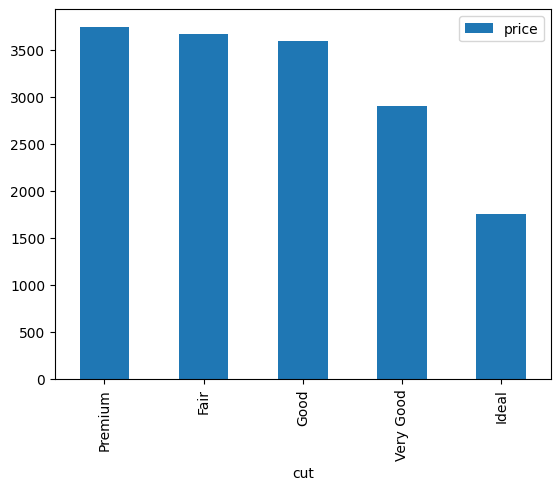

In [59]:
a.plot(kind="bar")